<a href="https://colab.research.google.com/github/MateuszKopczan/DS-CC/blob/master/Projekt1_MateuszKopczan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Niezbędne biblioteki**

---



In [307]:
import numpy as np
import pandas as pd
import seaborn as sns

**Dane dla miasta Montreal ze źródła internetowego**

---



In [308]:
data = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2022-09-12/data/listings.csv.gz")

**Próbka danych**

---



In [309]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2843,https://www.airbnb.com/rooms/2843,20220912200208,2022-09-12,city scrape,Fabulous downtown/airport room,Come stay in this trendy area of downtown Mont...,This area of St Henri is actually downtown Mon...,https://a0.muscache.com/pictures/397204dc-4123...,2319,https://www.airbnb.com/users/show/2319,Gail,2008-08-19,"Montreal, Canada",Manage a network of downtown rooms and private...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7c04e...,https://a0.muscache.com/im/pictures/user/7c04e...,Little Burgundy,2.0,5.0,"['email', 'phone']",t,t,"Montréal, Québec, Canada",Le Sud-Ouest,NaN,45.484960,-73.580010,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Microwave"", ""Window AC unit""...",$60.00,30,365,30,30,1125,1125,30.0,1125.0,NaN,t,7,7,7,80,2022-09-12,157,5,2,2009-06-20,2022-08-21,4.41,4.52,4.30,4.61,4.73,4.73,4.64,NaN,t,2,1,1,0,0.97
1,29059,https://www.airbnb.com/rooms/29059,20220912200208,2022-09-13,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,https://www.airbnb.com/users/show/125031,Maryline,2010-05-14,"Montreal, Canada",Voyageuse dans l'âme j'aime parcourir le monde...,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/8c35f...,https://a0.muscache.com/im/pictures/user/8c35f...,Downtown Montreal,2.0,2.0,"['email', 'phone', 'work_email']",t,t,NaN,Ville-Marie,NaN,45.519390,-73.564820,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Single level home"", ""Refrigerator"", ""Radiant...",$152.00,2,60,2,2,1125,1125,2.0,1125.0,NaN,t,8,24,47,306,2022-09-13,385,54,5,2010-06-20,2022-09-02,4.68,4.81,4.65,4.81,4.78,4.81,4.71,NaN,f,2,2,0,0,2.58
2,298059,https://www.airbnb.com/rooms/298059,20220912200208,2022-09-13,city scrape,Superb cottage Mile-End Plateau !,<b>The space</b><br />Superb bright cottage de...,NaN,https://a0.muscache.com/pictures/f53f3590-103d...,1536474,https://www.airbnb.com/users/show/1536474,Helene,2011-12-26,"Montreal, Canada",I am a TV series video editor. Love my job! ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1536474/profi...,https://a0.muscache.com/im/users/1536474/profi...,Mile End,1.0,1.0,"['email', 'phone']",t,f,NaN,Le Plateau-Mont-Royal,NaN,45.526650,-73.607300,Entire rental unit,Entire home/apt,8,NaN,1 bath,3.0,5.0,"[""Kitchen"", ""Fire extinguisher"", ""Cable TV"", ""...",$180.00,30,365,30,30,365,365,30.0,365.0,NaN,t,0,0,0,104,2022-09-13,52,0,0,2012-01-16,2014-10-18,4.87,4.94,4.92,4.96,5.00,4.63,4.84,NaN,f,1,1,0,0,0.40
3,29061,https://www.airbnb.com/rooms/29061,20220912200208,2022-09-13,city scrape,Maison hi

**Typy danych**

---


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13621 non-null  int64  
 1   listing_url                                   13621 non-null  object 
 2   scrape_id                                     13621 non-null  int64  
 3   last_scraped                                  13621 non-null  object 
 4   source                                        13621 non-null  object 
 5   name                                          13617 non-null  object 
 6   description                                   13321 non-null  object 
 7   neighborhood_overview                         7014 non-null   object 
 8   picture_url                                   13621 non-null  object 
 9   host_id                                       13621 non-null 

**Analiza zmiennych numerycznych opisujących zbiór**


---


Dostępne informacje:


*   wartości minimalne (min)
*   wartości maksymalne (max)
*   średnia (mean)
*   mediana i drugi kwartyl (50%)
*   trzeci kwartyl (75%)
*   odchylenie standardowe (std)
*   liczba danych brakujących lub nienumerycznych (missing)







In [311]:
dataDescribe = data.loc[:, ~data.columns.isin(['id', 'scrape_id', 'host_id'])].describe()
dataDescribe.loc['missing'] = data.isnull().sum()
dataDescribe.loc[['min','max','mean','50%', '75%', 'std', 'missing']]

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
min,1.000000,1.000000,NaN,45.382600,-73.974520,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
max,2121.000000,3311.000000,NaN,45.713800,-73.481630,16.000000,NaN,16.000000,50.000000,11684.000000,99999.000000,1125.000000,11684.000000,2.147484e+09,2.147484e+09,8353.800000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,734.000000,251.000000,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,183.000000,183.000000,57.000000,5.000000,24.730000
mean,16.579736,21.761454,NaN,45.514491,-73.591639,3.471845,NaN,1.564392,1.851899,15.623523,614.157918,13.988033,18.413332,1.419677e+06,2.523307e+06,16.545048,2.520806e+06,NaN,7.452096,19.195140,32.923133,128.566405,23.994200,8.402760,1.089494,4.581457,4.730882,4.605526,4.808609,4.798592,4.773791,4.624426,10.141473,8.713090,1.367814,0.014757,1.498029
50%,2.000000,3.000000,NaN,45.516270,-73.578870,3.000000,NaN,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,1.125000e+03,1.125000e+03,2.100000,1.125000e+03,NaN,1.000000,9.000000,21.000000,79.000000,6.000000,1.000000,0.000000,4.800000,4.880000,4.800000,4.940000,4.940000,4.890000,4.750000,2.000000,1.000000,0.000000,0.000000,0.730000
75%,8.000000,11.000000,NaN,45.532630,-73.564110,4.000000,NaN,2.000000,2.000000,21.000000,1125.000000,14.000000,28.000000,1.125000e+03,1.125000e+03,27.000000,1.125000e+03,NaN,13.000000,40.000000,68.000000,258.000000,24.000000,9.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,6.000000,4.000000,1.000000,0.000000,2.210000
std,67.545376,85.794659,NaN,0.032831,0.051336,2.413533,NaN,0.923448,1.420424,108.486987,1001.976275,41.785944,115.517681,5.518473e+07,7.356071e+07,84.298903,7.348795e+07,NaN,9.970360,21.814653,34.351926,133.881257,49.724181,16.396578,1.944228,0.775426,0.466797,0.567678,0.409869,0.421807,0.375431,0.503763,24.852071,24.091765,5.638011,0.180152,1.873254
missing,1.000000,1.000000,13621.0,0.000000,0.000000,0.000000,13621.0,1298.000000,191.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,13621.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2574.000000,2767.000000,2766.000000,2771.000000,2767.000000,2773.000000,2773.000000,0.000000,0.000000,0.000000,0.000000,2574.000000


**Analiza zmiennych kategorycznych**

---
Dostępne informacje:
*   liczby poszczególnych kategorii i ich liczności (count)
*   wartości najczęściej występującej i częstości jej występowania (freq)
*   liczba wartości unikalnych (unique)
*   liczba braków danych (missing)





In [312]:
dataDescribe = data.describe(exclude=np.number)
dataDescribe.loc['missing'] = data.isnull().sum()
dataDescribe.loc[['count', 'top', 'freq', 'unique', 'missing']]

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,13621,13621,13621,13617,13321,7014,13621,13621,13620,13620,11161,6644,9054,9054,9678,13618,13620,13620,7715,13621,13620,13620,7014,13621,13621,13621,13604,13621,13621,13621,13621,11047,11047,881,13621
top,https://www.airbnb.com/rooms/2843,2022-09-13,city scrape,Downtown Montreal Fully furnished apartment WIFI,Enjoy a stylish experience at this centrally l...,The appartement is located downtown near the a...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/38459934,Corporate Stays,2015-07-14,"Montreal, Canada",CorporateStays is the world's premier global n...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/763e0...,https://a0.muscache.com/im/pictures/user/763e0...,Le Plateau,"['email', 'phone']",t,t,"Montréal, Quebec, Canada",Ville-Marie,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",$100.00,t,2022-09-13,2022-06-19,2022-09-05,306822,f
freq,1,10988,9014,68,29,47,19,183,183,190,9153,183,6614,6564,4003,11188,183,183,1413,10614,13463,11366,3546,4061,6920,10523,9164,42,380,13216,10988,85,491,24,7757
unique,13621,3,2,13215,11998,5395,13323,8260,3834,3301,411,3604,4,58,93,2,8132,8132,114,7,2,2,68,33,55,4,32,12471,700,2,3,2503,1636,511,2
missing,0,0,0,4,300,6607,0,0,1,1,2460,6977,4567,4567,3943,3,1,1,5906,0,1,1,6607,0,0,0,17,0,0,0,0,2574,2574,12740,0


**Brakujące dane**

---



In [313]:
pd.set_option('display.max_rows', None)
data.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    13621
calendar_updated                                13621
bathrooms                                       13621
license                                         12740
host_about                                       6977
neighborhood_overview                            6607
neighbourhood                                    6607
host_neighbourhood                               5906
host_response_time                               4567
host_response_rate                               4567
host_acceptance_rate                             3943
review_scores_location                           2773
review_scores_value                              2773
review_scores_checkin                            2771
review_scores_accuracy                           2767
review_scores_communication                      2767
review_scores_cleanliness                        2766
reviews_per_month                                2574
first_review                

**Zmiana typu danych dla kolumn:**
*   neighbourhood_group_cleansed                    
*   license
*   host_about
*   neighbourhood






In [314]:
data['neighbourhood_group_cleansed'] = data['neighbourhood_group_cleansed'].astype(str)
data['license'] = data['license'].astype(str)
data['host_about'] = data['host_about'].astype(str)
data['neighbourhood'] = data['neighbourhood'].astype(str)

**Ponowne sprawdzenie brakujących danych**

---



In [315]:
data.isnull().sum().sort_values(ascending=False)

bathrooms                                       13621
calendar_updated                                13621
neighborhood_overview                            6607
host_neighbourhood                               5906
host_response_rate                               4567
host_response_time                               4567
host_acceptance_rate                             3943
review_scores_value                              2773
review_scores_location                           2773
review_scores_checkin                            2771
review_scores_communication                      2767
review_scores_accuracy                           2767
review_scores_cleanliness                        2766
reviews_per_month                                2574
first_review                                     2574
last_review                                      2574
review_scores_rating                             2574
host_location                                    2460
bedrooms                    

**Weryfikacja danych**

---



In [316]:
data.price = data.price.str.replace('[$,]', '', regex=True).astype(np.float64)

In [317]:
data.host_acceptance_rate = data.host_acceptance_rate.str.replace('%', '').astype(np.float64)/100

In [318]:
data.host_response_rate = data.host_response_rate.str.replace('%', '').astype(np.float64)/100

In [319]:
data.host_is_superhost = data.host_is_superhost.map({'t': True, 'f': False})

In [320]:
data.host_has_profile_pic = data.host_has_profile_pic.map({'t': True, 'f': False})

In [321]:
data.host_identity_verified = data.host_identity_verified.map({'t': True, 'f': False})

In [322]:
data.has_availability = data.has_availability.map({'t': True, 'f': False}) 

In [323]:
data.instant_bookable = data.instant_bookable.map({'t': True, 'f': False})

In [324]:
data.bathrooms = np.where(data.bathrooms_text.str.contains('half', case=False, regex=False, na=False), 0.5, data.bathrooms_text.str.split().str[0]).astype(np.float64)

In [325]:
data.host_response_time = data.host_response_time.astype('category')

In [326]:
data.host_verifications.str[1:-1].replace("[' ]", '', regex=True).str.split(',').drop_duplicates()
data.host_verifications = data.host_verifications.str[1:-1].replace("[' ]", '', regex=True).str.split(',')

In [327]:
data.amenities.str[1:-1].replace("[\' ]", '', regex=True).str.split(',').drop_duplicates()
data.amenities = data.amenities.str[1:-1].replace("[\' ]", '', regex=True).str.split(',')

In [328]:
pd.options.display.max_rows = None
data.isna().sum().sort_values(ascending=False)

calendar_updated                                13621
neighborhood_overview                            6607
host_neighbourhood                               5906
host_response_rate                               4567
host_response_time                               4567
host_acceptance_rate                             3943
review_scores_value                              2773
review_scores_location                           2773
review_scores_checkin                            2771
review_scores_accuracy                           2767
review_scores_communication                      2767
review_scores_cleanliness                        2766
last_review                                      2574
first_review                                     2574
review_scores_rating                             2574
reviews_per_month                                2574
host_location                                    2460
bedrooms                                         1298
description                 

**Wizualizacja rozkładu niektórych zmiennych numerycznych**

---



Skośność: 2.5985422710303614
Kurtoza: 14.100265327023266


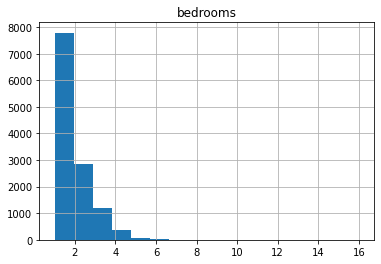

In [329]:
data.hist(column='bedrooms', bins=int(max(data.bedrooms)))
print("Skośność:", data.bedrooms.skew(skipna = True))
print("Kurtoza:", data.bedrooms.kurt(skipna = True))

Skośność: 6.000978487050516
Kurtoza: 118.53748612334475


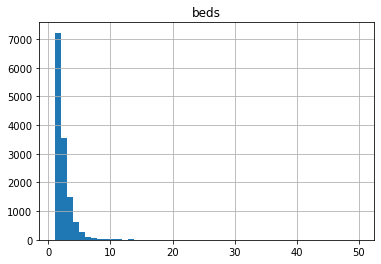

In [330]:
data.hist(column='beds', bins=int(max(data.beds)))
print("Skośność:", data.beds.skew(skipna = True))
print("Kurtoza:", data.beds.kurt(skipna = True))

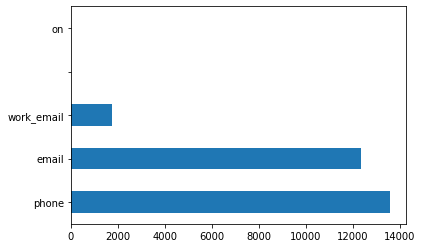

In [331]:
pd.Series([item for sublist in data.host_verifications for item in sublist]).value_counts().plot(kind='barh')

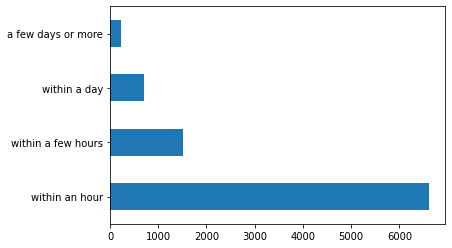

In [332]:
data.host_response_time.value_counts().plot(kind='barh')

In [333]:
pd.Series([item for sublist in data.amenities for item in sublist]).value_counts()

"Kitchen"                                                                               12862
"Wifi"                                                                                  12674
"Smokealarm"                                                                            12422
"Longtermstaysallowed"                                                                  11908
"Essentials"                                                                            11743
"Hangers"                                                                               10287
"Heating"                                                                               10158
"Hairdryer"                                                                              9300
"Hotwater"                                                                               9146
"Washer"                                                                                 8851
"Dishesandsilverware"                                       

Skośność: 6.000978487050516
Kurtoza: 118.53748612334475


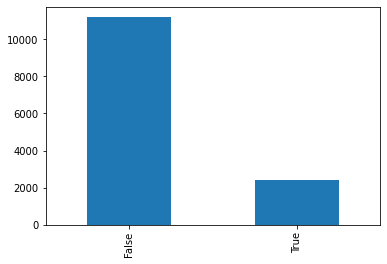

In [334]:
data.host_is_superhost.value_counts().plot(kind='bar')
print("Skośność:", data.beds.skew(skipna = True))
print("Kurtoza:", data.beds.kurt(skipna = True))

**Czyszczenie danych**

---



In [335]:
data.drop('neighbourhood_group_cleansed', axis=1, inplace=True)
data.drop('bathrooms', axis=1, inplace=True)
data.drop('calendar_updated', axis=1, inplace=True)
data.drop('license', axis=1, inplace=True)

**Wypełnianie brakujących wartości medianą zbioru**

In [336]:
data.review_scores_rating = data.review_scores_rating.fillna(data.review_scores_rating.median())
data.review_scores_accuracy = data.review_scores_accuracy.fillna(data.review_scores_accuracy.median())
data.review_scores_cleanliness = data.review_scores_cleanliness.fillna(data.review_scores_cleanliness.median())
data.review_scores_checkin = data.review_scores_checkin.fillna(data.review_scores_checkin.median())
data.review_scores_communication = data.review_scores_communication.fillna(data.review_scores_communication.median())
data.review_scores_location = data.review_scores_location.fillna(data.review_scores_location.median())
data.review_scores_value = data.review_scores_value.fillna(data.review_scores_value.median())
data.reviews_per_month = data.reviews_per_month.fillna(data.reviews_per_month.median())

**Przycięcie wartości odstających**

AxesSubplot(0.125,0.125;0.775x0.755)


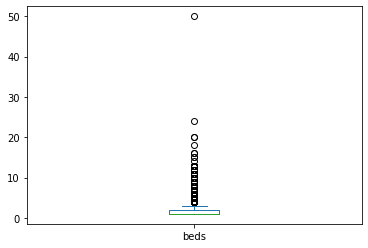

In [337]:
print(data.beds.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


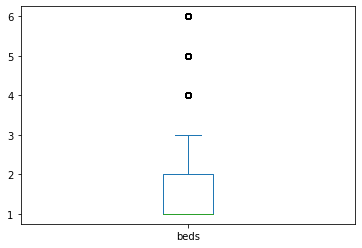

In [338]:
data = data[np.abs(data.beds-data.beds.mean()) <= (3*data.beds.std())]
print(data.beds.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


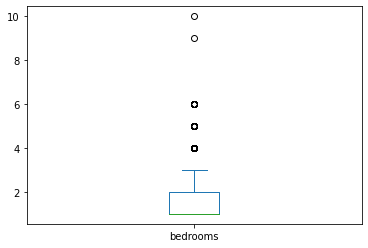

In [339]:
print(data.bedrooms.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


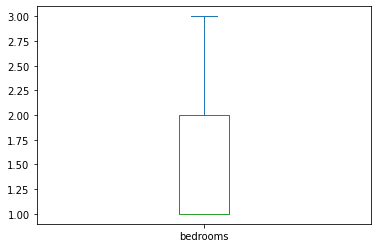

In [340]:
data = data[np.abs(data.bedrooms-data.bedrooms.mean()) <= (3*data.bedrooms.std())]
print(data.bedrooms.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


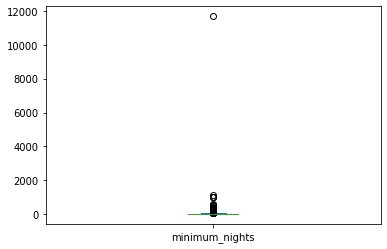

In [341]:
print(data.minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


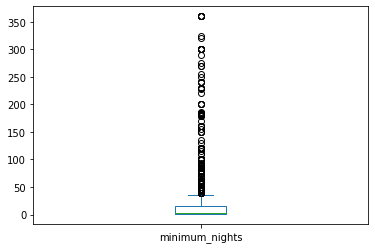

In [342]:
data = data[np.abs(data.minimum_nights-data.minimum_nights.mean()) <= (3*data.minimum_nights.std())]
print(data.minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


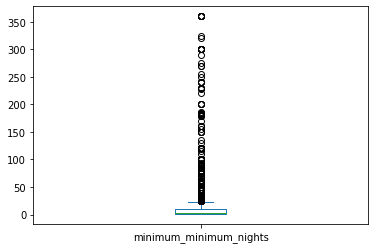

In [343]:
print(data.minimum_minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


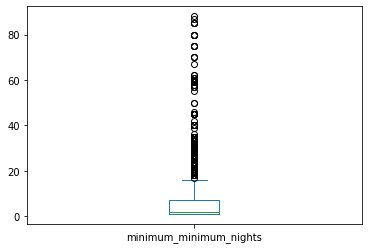

In [344]:
data = data[np.abs(data.minimum_minimum_nights-data.minimum_minimum_nights.mean()) <= (3*data.minimum_minimum_nights.std())]
print(data.minimum_minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


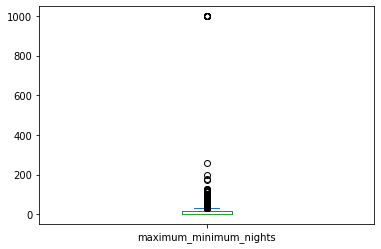

In [345]:
print(data.maximum_minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


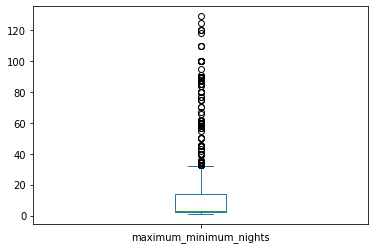

In [346]:
data = data[np.abs(data.maximum_minimum_nights-data.maximum_minimum_nights.mean()) <= (3*data.maximum_minimum_nights.std())]
print(data.maximum_minimum_nights.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


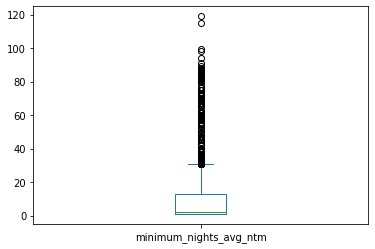

In [347]:
print(data.minimum_nights_avg_ntm.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


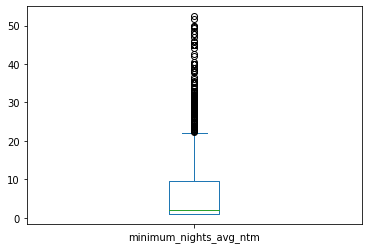

In [348]:
data = data[np.abs(data.minimum_nights_avg_ntm-data.minimum_nights_avg_ntm.mean()) <= (3*data.minimum_nights_avg_ntm.std())]
print(data.minimum_nights_avg_ntm.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


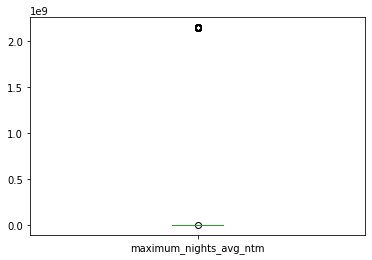

In [349]:
print(data.maximum_nights_avg_ntm.plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


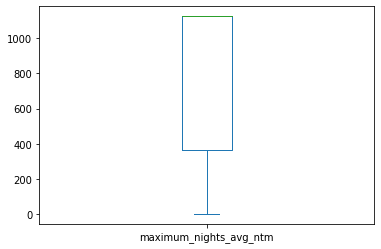

In [350]:
data = data[np.abs(data.maximum_nights_avg_ntm-data.maximum_nights_avg_ntm.mean()) <= (3*data.maximum_nights_avg_ntm.std())]
data = data[np.abs(data.maximum_nights_avg_ntm-data.maximum_nights_avg_ntm.mean()) <= (3*data.maximum_nights_avg_ntm.std())]
print(data.maximum_nights_avg_ntm.plot.box())

**Badanie zależności zmiennych**

---



**Współczynnik Pearsona**

In [351]:
ids_columns = ['id', 'scrape_id', 'host_id']
pearson = data.loc[:, ~data.columns.isin(ids_columns)].select_dtypes(include=np.number).corr(method="pearson")
pearson.unstack().sort_values(ascending=False)

host_response_rate                            host_response_rate                              1.000000
minimum_nights                                minimum_nights                                  1.000000
minimum_nights_avg_ntm                        minimum_nights_avg_ntm                          1.000000
maximum_maximum_nights                        maximum_maximum_nights                          1.000000
minimum_maximum_nights                        minimum_maximum_nights                          1.000000
maximum_minimum_nights                        maximum_minimum_nights                          1.000000
minimum_minimum_nights                        minimum_minimum_nights                          1.000000
maximum_nights                                maximum_nights                                  1.000000
price                                         price                                           1.000000
availability_60                               availability_60            

**Pary zmiennych o największych korelacjach**

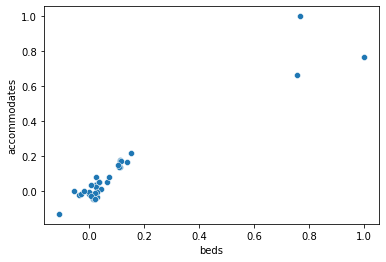

In [352]:
sns.scatterplot(data=pearson, x="beds", y="accommodates")

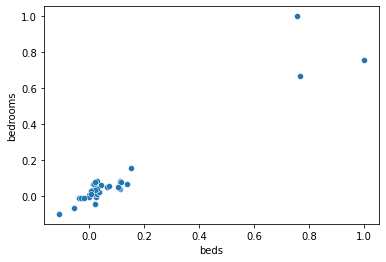

In [353]:
sns.scatterplot(data=pearson, x="beds", y="bedrooms")

**Współczynnik Spearmana**

In [354]:
spearman = data.loc[:, ~data.columns.isin(ids_columns)].select_dtypes(include=np.number).corr(method="spearman")
spearman.unstack().sort_values(ascending=False)

host_response_rate                            host_response_rate                              1.000000
minimum_nights                                minimum_nights                                  1.000000
minimum_nights_avg_ntm                        minimum_nights_avg_ntm                          1.000000
maximum_maximum_nights                        maximum_maximum_nights                          1.000000
minimum_maximum_nights                        minimum_maximum_nights                          1.000000
maximum_minimum_nights                        maximum_minimum_nights                          1.000000
minimum_minimum_nights                        minimum_minimum_nights                          1.000000
maximum_nights                                maximum_nights                                  1.000000
price                                         price                                           1.000000
availability_60                               availability_60            

**Pary zmiennych o największych korelacjach**

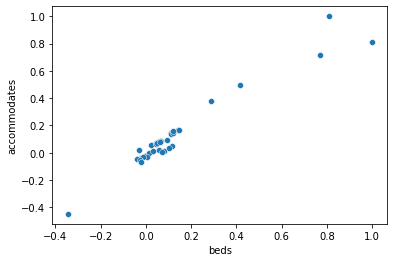

In [355]:
sns.scatterplot(data=spearman, x="beds", y="accommodates")

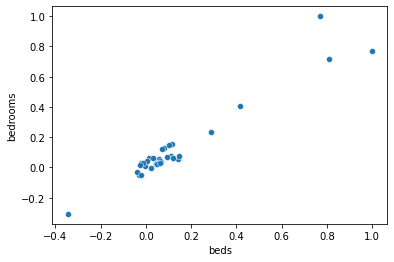

In [356]:
sns.scatterplot(data=spearman, x="beds", y="bedrooms")